#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

In [174]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [175]:
# Geopandas 

In [176]:
Trees_RH = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Trees_Closest.shp')

In [177]:
#Changing CRS 
Trees_RH_4326= Trees_RH.to_crs(epsg=4326)

In [178]:
Trees_RH.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'geometry'],
      dtype='object')

In [179]:
Trees_RH.head(3)

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,Plot_3,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.680 61322.481)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535827.853 61327.054)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,4.183,7703.11,-999,1,1,1,9.32195,0.554779,None,POINT (535829.889 61327.977)


In [180]:
subplots = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_25ha.shp')

In [181]:
subplots

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((535822.917 61366.633, 535823.867 613..."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((535821.018 61316.669, 535821.968 613..."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((535872.881 61364.734, 535873.831 613..."
3,NASA01,2.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,31.38,23.51,41.00,40,160,1.14,4.55,0.49,26.57,"POLYGON ((535871.932 61339.752, 535872.881 613..."
4,NASA02,1.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,135.58,98.84,186.53,122,488,3.43,13.73,0.53,59.23,"POLYGON ((535397.386 60965.832, 535398.337 609..."
5,NASA02,1.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,164.60,133.47,201.55,142,568,4.84,19.36,0.56,42.10,"POLYGON ((535396.436 60940.851, 535397.386 609..."
6,NASA02,2.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,143.22,125.73,161.85,186,744,5.05,20.21,0.56,28.44,"POLYGON ((535447.350 60963.931, 535448.301 609..."
7,NASA02,2.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,628.04,480.42,807.15,146,584,11.90,47.61,0.70,42.50,"POLYGON ((535446.399 60938.949, 535447.350 609..."
8,NASA03,1.1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,14.74,11.23,19.21,35,140,0.75,3.01,0.40,26.07,"POLYGON ((536078.570 60717.052, 536079.520 607..."
9,NASA03,1.2,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,27.77,20.37,38.30,61,244,0.97,3.89,0.51,35.67,"POLYGON ((536077.620 60692.070, 536078.570 607..."


In [182]:
#Changing CRS 
subplots_4326= subplots.to_crs(epsg=4326)

In [183]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry'],
      dtype='object')

In [184]:
subplots_4326['subplot'] = subplots_4326['subplot'].astype(str)

In [185]:
subplots_4326['subplot25'] = subplots_4326['plot'] + subplots_4326['subplot']

In [186]:
subplots_4326.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry', 'subplot25'],
      dtype='object')

In [187]:
subplots_4326_Keep = ['subplot25','geometry']

In [188]:
subplots_4326 = subplots_4326[subplots_4326_Keep]

In [189]:
subplots_4326.columns

Index(['subplot25', 'geometry'], dtype='object')

In [190]:
Trees_RH_subplots = gpd.overlay(Trees_RH_4326,subplots_4326, how = 'intersection')

In [191]:
Trees_RH_subplots

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,Plot_3,subplot25,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA011.2,POINT (9.32201 0.55479)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA011.2,POINT (9.32199 0.55484)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA011.2,POINT (9.32201 0.55484)
3,1,10.448032,4,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6504,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA011.2,POINT (9.32201 0.55485)
4,1,7.489962,5,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6505,...,7703.11,-999,1,1,1,9.321950,0.554779,None,NASA011.2,POINT (9.32200 0.55483)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,1,1.393024,6614,NASA23,11,2016-02-21,NA,NA,0.534143,3793,...,7721.62,-999,1,1,1,9.316258,0.545373,None,NASA232.2,POINT (9.31627 0.54538)
6277,1,1.990312,6616,NASA23,11,2016-02-21,NA,NA,0.534143,3795,...,7722.82,-999,2,2,1,9.316340,0.545378,None,NASA232.2,POINT (9.31633 0.54536)
6278,1,1.990312,6617,NASA23,11,2016-02-21,NA,NA,0.534143,3796,...,7722.82,-999,2,2,1,9.316340,0.545378,None,NASA232.2,POINT (9.31633 0.54536)
6279,1,1.990312,6618,NASA23,11,2016-02-21,NA,NA,0.534143,3797,...,7722.82,-999,2,2,1,9.316340,0.545378,None,NASA232.2,POINT (9.31633 0.54536)


In [192]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'subplot25', 'geometry'],
      dtype='object')

In [193]:
Trees_RH_subplots['plot_3'] = Trees_RH_subplots['subplot25']

In [194]:
Trees_RH_subplots.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'Plot_3', 'subplot25', 'geometry', 'plot_3'],
      dtype='object')

In [195]:
#SUM

In [196]:
sum = ['subplot25', 'm_agb']

In [197]:
Trees_RH_sum= Trees_RH_subplots[sum]

In [198]:
Trees_RH_sum = Trees_RH_sum.groupby(by='subplot25').sum('m_agb')

In [199]:
Trees_RH_sum.columns

Index(['m_agb'], dtype='object')

In [200]:
Trees_RH_sum

,m_agb
subplot25,
NASA011.1,1938.80
NASA011.2,3478.87
NASA012.1,11474.29
NASA012.2,8096.01
NASA021.1,14658.58
NASA021.2,35032.13
NASA022.1,32138.04
NASA022.2,158759.38
NASA031.1,3447.55


In [201]:
#MEAN

In [202]:
m = ['plot_3','RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100']

In [203]:
Trees_RH_mean = Trees_RH_subplots[m]

In [204]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA011.2,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
1,NASA011.2,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
2,NASA011.2,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
3,NASA011.2,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
4,NASA011.2,-0.22,0.67,1.50,2.24,2.92,3.59,4.19,4.79,5.31,...,7.78,8.22,8.75,9.35,10.39,10.77,11.14,11.74,12.56,14.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,NASA232.2,-1.20,-0.68,-0.23,0.15,0.60,1.12,1.87,3.51,5.98,...,16.98,17.95,18.70,19.37,20.27,20.49,20.79,21.17,21.77,23.41
6277,NASA232.2,-1.48,-1.10,-0.73,-0.51,-0.21,0.02,0.32,0.54,0.84,...,3.31,4.21,5.40,9.14,17.07,17.67,18.20,18.79,19.62,21.71
6278,NASA232.2,-1.48,-1.10,-0.73,-0.51,-0.21,0.02,0.32,0.54,0.84,...,3.31,4.21,5.40,9.14,17.07,17.67,18.20,18.79,19.62,21.71
6279,NASA232.2,-1.48,-1.10,-0.73,-0.51,-0.21,0.02,0.32,0.54,0.84,...,3.31,4.21,5.40,9.14,17.07,17.67,18.20,18.79,19.62,21.71


In [205]:
Trees_RH_mean = Trees_RH_mean.groupby(by='plot_3').mean()

In [206]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011.1,-1.237407,-0.622593,-0.113519,0.450000,1.029074,1.721296,2.522407,3.389444,4.329630,5.083519,...,7.440000,7.952037,8.484815,9.157037,10.087778,10.338333,10.692778,11.127407,11.791111,13.288519
NASA011.2,-1.020189,-0.333396,0.253962,0.834717,1.416038,2.063396,2.747170,3.491132,4.240000,4.892264,...,6.974340,7.434717,7.947170,8.580755,9.520943,9.817170,10.183208,10.676981,11.441887,13.073019
NASA012.1,-1.763214,-1.365714,-1.046190,-0.770119,-0.486310,-0.267262,-0.034524,0.245000,0.506905,0.810952,...,2.248929,2.642500,3.171190,4.001310,5.304405,5.885238,6.466310,7.107024,8.058810,9.692500
NASA012.2,-1.773673,-1.443469,-1.152041,-0.918980,-0.672041,-0.510612,-0.328980,-0.126327,0.053673,0.246531,...,1.126327,1.421633,1.889592,2.720000,3.890612,4.191429,4.523673,4.927347,5.618571,7.015510
NASA021.1,2.788532,4.696789,6.175138,7.537615,8.970459,10.588257,11.886606,12.948991,13.913394,15.024037,...,22.256422,23.295229,24.321927,25.447523,27.308991,27.849541,28.826697,31.949908,33.211468,35.157431
NASA021.2,-0.622137,0.619008,1.535878,2.285725,2.948473,3.577634,4.185649,4.853435,5.536794,6.259389,...,10.444198,11.619389,12.760840,14.088397,15.858168,16.407557,17.009771,17.668931,18.558550,20.193130
NASA022.1,2.982386,4.768807,6.174318,7.423182,8.601705,9.840170,11.210739,12.673182,14.046761,15.280568,...,21.296591,22.929034,25.054489,27.029602,29.458750,30.162784,31.131932,33.376648,35.346818,37.745057
NASA022.2,9.119662,11.866892,14.121419,16.168514,18.243716,20.373311,22.825405,24.769189,26.187568,27.323851,...,31.746757,33.085676,34.154257,35.782365,38.084595,38.645338,39.348243,40.150338,41.061351,42.638041
NASA031.1,-2.009118,-0.960294,-0.209412,0.409118,0.920588,1.366471,1.775588,2.147647,2.512941,2.877647,...,4.625294,5.287647,6.126471,6.993529,8.183529,8.521471,8.939706,9.487647,10.341765,12.424412


In [207]:
#GEO 

In [208]:
Trees_RH_mean

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011.1,-1.237407,-0.622593,-0.113519,0.450000,1.029074,1.721296,2.522407,3.389444,4.329630,5.083519,...,7.440000,7.952037,8.484815,9.157037,10.087778,10.338333,10.692778,11.127407,11.791111,13.288519
NASA011.2,-1.020189,-0.333396,0.253962,0.834717,1.416038,2.063396,2.747170,3.491132,4.240000,4.892264,...,6.974340,7.434717,7.947170,8.580755,9.520943,9.817170,10.183208,10.676981,11.441887,13.073019
NASA012.1,-1.763214,-1.365714,-1.046190,-0.770119,-0.486310,-0.267262,-0.034524,0.245000,0.506905,0.810952,...,2.248929,2.642500,3.171190,4.001310,5.304405,5.885238,6.466310,7.107024,8.058810,9.692500
NASA012.2,-1.773673,-1.443469,-1.152041,-0.918980,-0.672041,-0.510612,-0.328980,-0.126327,0.053673,0.246531,...,1.126327,1.421633,1.889592,2.720000,3.890612,4.191429,4.523673,4.927347,5.618571,7.015510
NASA021.1,2.788532,4.696789,6.175138,7.537615,8.970459,10.588257,11.886606,12.948991,13.913394,15.024037,...,22.256422,23.295229,24.321927,25.447523,27.308991,27.849541,28.826697,31.949908,33.211468,35.157431
NASA021.2,-0.622137,0.619008,1.535878,2.285725,2.948473,3.577634,4.185649,4.853435,5.536794,6.259389,...,10.444198,11.619389,12.760840,14.088397,15.858168,16.407557,17.009771,17.668931,18.558550,20.193130
NASA022.1,2.982386,4.768807,6.174318,7.423182,8.601705,9.840170,11.210739,12.673182,14.046761,15.280568,...,21.296591,22.929034,25.054489,27.029602,29.458750,30.162784,31.131932,33.376648,35.346818,37.745057
NASA022.2,9.119662,11.866892,14.121419,16.168514,18.243716,20.373311,22.825405,24.769189,26.187568,27.323851,...,31.746757,33.085676,34.154257,35.782365,38.084595,38.645338,39.348243,40.150338,41.061351,42.638041
NASA031.1,-2.009118,-0.960294,-0.209412,0.409118,0.920588,1.366471,1.775588,2.147647,2.512941,2.877647,...,4.625294,5.287647,6.126471,6.993529,8.183529,8.521471,8.939706,9.487647,10.341765,12.424412


In [209]:
Trees_RH_mean.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [210]:
Trees_RH_mean = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_mean.csv')

In [211]:
Trees_RH_mean

,plot_3,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH75,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100
0,NASA011.1,-1.237407,-0.622593,-0.113519,0.450000,1.029074,1.721296,2.522407,3.389444,4.329630,...,7.440000,7.952037,8.484815,9.157037,10.087778,10.338333,10.692778,11.127407,11.791111,13.288519
1,NASA011.2,-1.020189,-0.333396,0.253962,0.834717,1.416038,2.063396,2.747170,3.491132,4.240000,...,6.974340,7.434717,7.947170,8.580755,9.520943,9.817170,10.183208,10.676981,11.441887,13.073019
2,NASA012.1,-1.763214,-1.365714,-1.046190,-0.770119,-0.486310,-0.267262,-0.034524,0.245000,0.506905,...,2.248929,2.642500,3.171190,4.001310,5.304405,5.885238,6.466310,7.107024,8.058810,9.692500
3,NASA012.2,-1.773673,-1.443469,-1.152041,-0.918980,-0.672041,-0.510612,-0.328980,-0.126327,0.053673,...,1.126327,1.421633,1.889592,2.720000,3.890612,4.191429,4.523673,4.927347,5.618571,7.015510
4,NASA021.1,2.788532,4.696789,6.175138,7.537615,8.970459,10.588257,11.886606,12.948991,13.913394,...,22.256422,23.295229,24.321927,25.447523,27.308991,27.849541,28.826697,31.949908,33.211468,35.157431
5,NASA021.2,-0.622137,0.619008,1.535878,2.285725,2.948473,3.577634,4.185649,4.853435,5.536794,...,10.444198,11.619389,12.760840,14.088397,15.858168,16.407557,17.009771,17.668931,18.558550,20.193130
6,NASA022.1,2.982386,4.768807,6.174318,7.423182,8.601705,9.840170,11.210739,12.673182,14.046761,...,21.296591,22.929034,25.054489,27.029602,29.458750,30.162784,31.131932,33.376648,35.346818,37.745057
7,NASA022.2,9.119662,11.866892,14.121419,16.168514,18.243716,20.373311,22.825405,24.769189,26.187568,...,31.746757,33.085676,34.154257,35.782365,38.084595,38.645338,39.348243,40.150338,41.061351,42.638041
8,NASA031.1,-2.009118,-0.960294,-0.209412,0.409118,0.920588,1.366471,1.775588,2.147647,2.512941,...,4.625294,5.287647,6.126471,6.993529,8.183529,8.521471,8.939706,9.487647,10.341765,12.424412
9,NASA031.2,-1.483333,-0.316667,0.617719,1.339123,1.935088,2.456667,2.937719,3.379825,3.795965,...,5.864035,6.369298,6.961404,7.764035,8.893333,9.195439,9.576316,10.051404,10.759123,12.422105


In [212]:
Trees_RH_sum.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [213]:
Trees_RH_sum = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_RH_sum.csv')

In [214]:
Trees_RH_sum

,subplot25,m_agb
0,NASA011.1,1938.80
1,NASA011.2,3478.87
2,NASA012.1,11474.29
3,NASA012.2,8096.01
4,NASA021.1,14658.58
5,NASA021.2,35032.13
6,NASA022.1,32138.04
7,NASA022.2,158759.38
8,NASA031.1,3447.55
9,NASA031.2,6787.85


In [215]:
#Reducing 

In [216]:
#https://realpython.com/pandas-merge-join-and-concat/

In [217]:
Tree_RH_plot25= Trees_RH_mean.set_index('plot_3').join( Trees_RH_sum.set_index('subplot25'))

In [218]:
Tree_RH_plot25

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH80,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,m_agb
plot_3,,,,,,,,,,,,,,,,,,,,,
NASA011.1,-1.237407,-0.622593,-0.113519,0.450000,1.029074,1.721296,2.522407,3.389444,4.329630,5.083519,...,7.952037,8.484815,9.157037,10.087778,10.338333,10.692778,11.127407,11.791111,13.288519,1938.80
NASA011.2,-1.020189,-0.333396,0.253962,0.834717,1.416038,2.063396,2.747170,3.491132,4.240000,4.892264,...,7.434717,7.947170,8.580755,9.520943,9.817170,10.183208,10.676981,11.441887,13.073019,3478.87
NASA012.1,-1.763214,-1.365714,-1.046190,-0.770119,-0.486310,-0.267262,-0.034524,0.245000,0.506905,0.810952,...,2.642500,3.171190,4.001310,5.304405,5.885238,6.466310,7.107024,8.058810,9.692500,11474.29
NASA012.2,-1.773673,-1.443469,-1.152041,-0.918980,-0.672041,-0.510612,-0.328980,-0.126327,0.053673,0.246531,...,1.421633,1.889592,2.720000,3.890612,4.191429,4.523673,4.927347,5.618571,7.015510,8096.01
NASA021.1,2.788532,4.696789,6.175138,7.537615,8.970459,10.588257,11.886606,12.948991,13.913394,15.024037,...,23.295229,24.321927,25.447523,27.308991,27.849541,28.826697,31.949908,33.211468,35.157431,14658.58
NASA021.2,-0.622137,0.619008,1.535878,2.285725,2.948473,3.577634,4.185649,4.853435,5.536794,6.259389,...,11.619389,12.760840,14.088397,15.858168,16.407557,17.009771,17.668931,18.558550,20.193130,35032.13
NASA022.1,2.982386,4.768807,6.174318,7.423182,8.601705,9.840170,11.210739,12.673182,14.046761,15.280568,...,22.929034,25.054489,27.029602,29.458750,30.162784,31.131932,33.376648,35.346818,37.745057,32138.04
NASA022.2,9.119662,11.866892,14.121419,16.168514,18.243716,20.373311,22.825405,24.769189,26.187568,27.323851,...,33.085676,34.154257,35.782365,38.084595,38.645338,39.348243,40.150338,41.061351,42.638041,158759.38
NASA031.1,-2.009118,-0.960294,-0.209412,0.409118,0.920588,1.366471,1.775588,2.147647,2.512941,2.877647,...,5.287647,6.126471,6.993529,8.183529,8.521471,8.939706,9.487647,10.341765,12.424412,3447.55


In [219]:
Tree_RH_plot25.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot25.csv')

In [220]:
Tree_RH_plot25 = pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Tree_RH_plot25.csv')

In [221]:
Tree_RH_plot25.columns

Index(['plot_3', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40',
       'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85',
       'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100', 'm_agb'],
      dtype='object')

In [222]:
#TreesRH13_22.columns

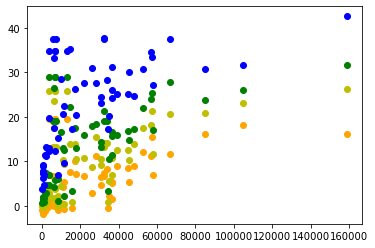

In [223]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH25,color='orange') 
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH50,color='y')
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH75,color='g')
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH100,color='b')
matplotlib.pyplot.show()

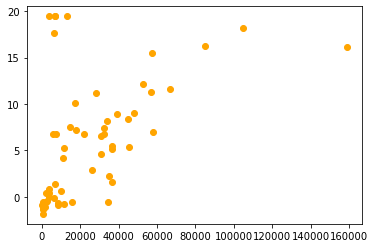

In [224]:
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH25,color='orange')

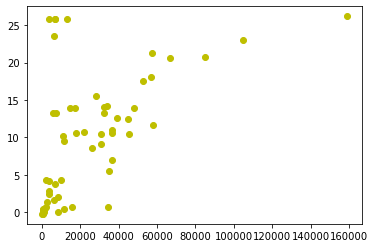

In [225]:
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH50,color='y')

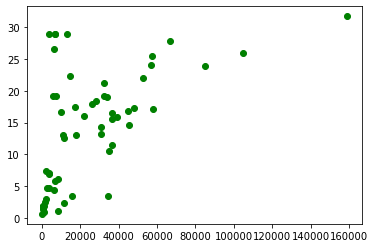

In [226]:
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH75,color='g')

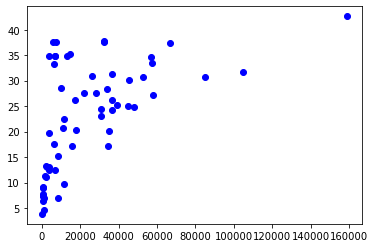

In [227]:
matplotlib.pyplot.scatter(Tree_RH_plot25.m_agb,Tree_RH_plot25.RH100,color='b')